In [4]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("heart_2020_cleaned.csv")

In [6]:
df.shape

(79649, 18)

In [7]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [8]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


####Whether one has heart Disease ?

###**Risk Factors**
 - 'KidneyDisease' , 'Diabetic'  , 'Stroke' , 'Asthma' , 'SkinCancer'

###**Bad Habits**
 - 'Smoking' , 'AlcoholDrinking'

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79649 entries, 0 to 79648
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      79649 non-null  object 
 1   BMI               79649 non-null  float64
 2   Smoking           79649 non-null  object 
 3   AlcoholDrinking   79649 non-null  object 
 4   Stroke            79649 non-null  object 
 5   PhysicalHealth    79649 non-null  float64
 6   MentalHealth      79649 non-null  float64
 7   DiffWalking       79649 non-null  object 
 8   Sex               79649 non-null  object 
 9   AgeCategory       79649 non-null  object 
 10  Race              79648 non-null  object 
 11  Diabetic          79648 non-null  object 
 12  PhysicalActivity  79648 non-null  object 
 13  GenHealth         79648 non-null  object 
 14  SleepTime         79648 non-null  float64
 15  Asthma            79648 non-null  object 
 16  KidneyDisease     79648 non-null  object

In [10]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,79649.000000,79649.000000,79649.000000,79648.000000
mean,28.039617,3.503233,3.911060,7.101823
std,6.305959,8.077658,7.961556,1.497506
min,12.020000,0.000000,0.000000,1.000000
25%,23.710000,0.000000,0.000000,6.000000
50%,27.070000,0.000000,0.000000,7.000000
75%,31.180000,2.000000,3.000000,8.000000
max,87.050000,30.000000,30.000000,24.000000


###Inference
 - Sleep time and BMI follows normal distribution
 - Physical and Mental Health can be measured in the same Range


In [11]:
df.nunique()

HeartDisease           2
BMI                 2651
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           14
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             23
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [12]:
df['Race'].unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic', nan], dtype=object)

Cleaning

In [13]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                1
Diabetic            1
PhysicalActivity    1
GenHealth           1
SleepTime           1
Asthma              1
KidneyDisease       1
SkinCancer          1
dtype: int64

In [14]:
df.duplicated().sum()

1208

In [15]:
df = df.drop_duplicates()
df.duplicated().sum()


0

####Relationship Analysis



In [16]:
corelation = df.corr()

<ipython-input-16-58424b070ea4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corelation = df.corr()


<Axes: >

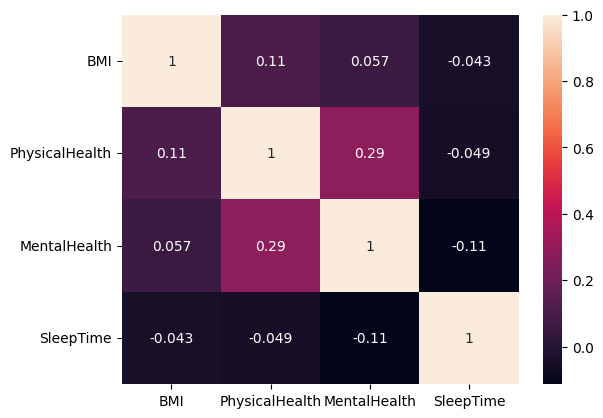

In [17]:
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot= True)

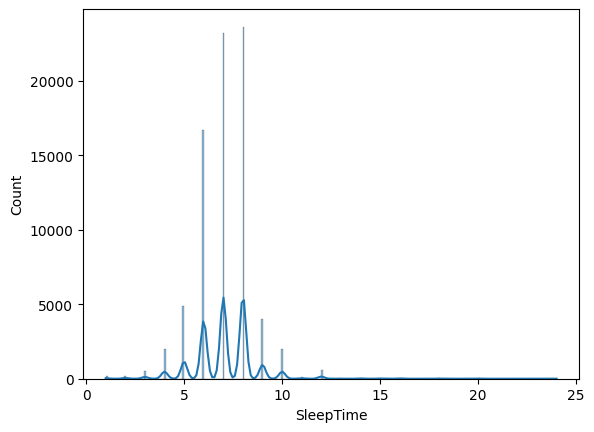

In [18]:
#Sleep Time Distribution
sns.histplot(df['SleepTime'], kde=True)
plt.show()


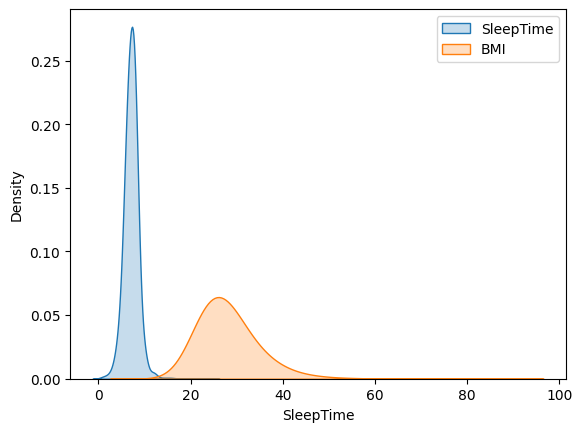

In [27]:

sns.kdeplot(df["SleepTime"], label="SleepTime", fill=True, bw_method=0.5)
sns.kdeplot(df["BMI"], label="BMI", fill=True, bw_method=0.5)
plt.legend()
plt.show()



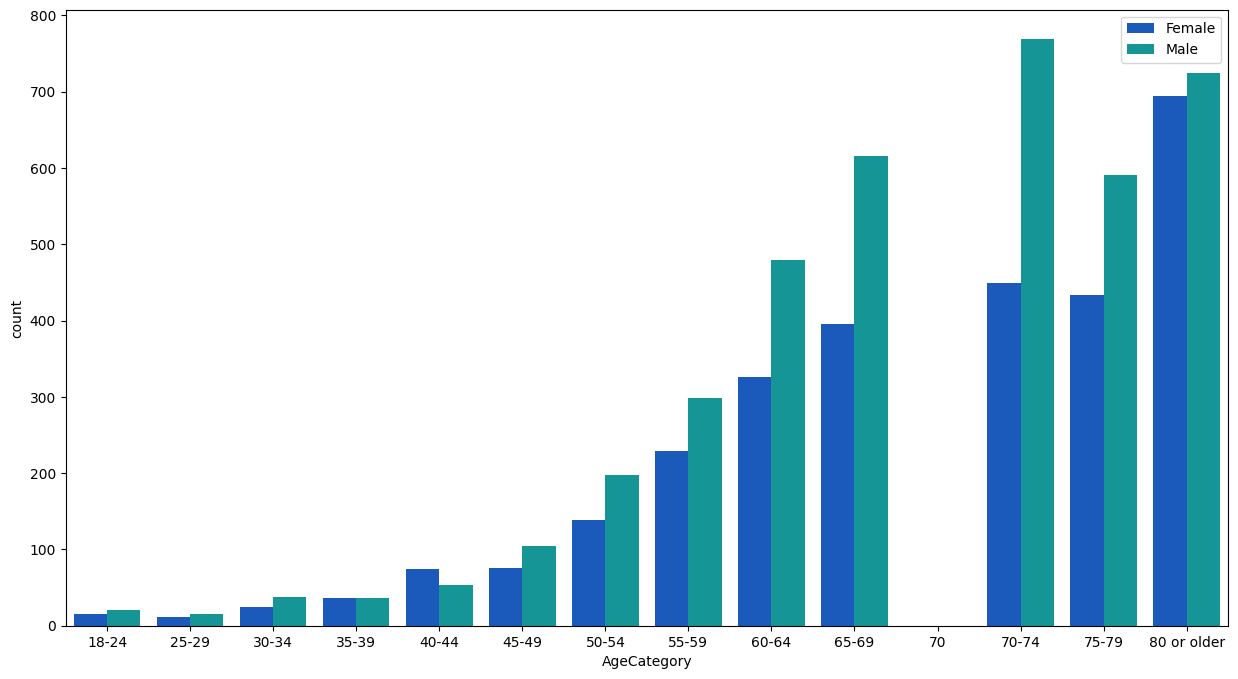

In [20]:
#gender and age effect on HeartDisease Distribution
order = pd.unique(df.AgeCategory.values)
order.sort()
plt.figure(figsize = (15,8))
sns.countplot(data=df[df['HeartDisease']=='Yes'], x='AgeCategory', hue='Sex', palette='winter', order=order)
plt.legend(['Female','Male'])
plt.show()

###Insights
 - Heart diseases increases with age
 - Males suffer more than females from heart diseases

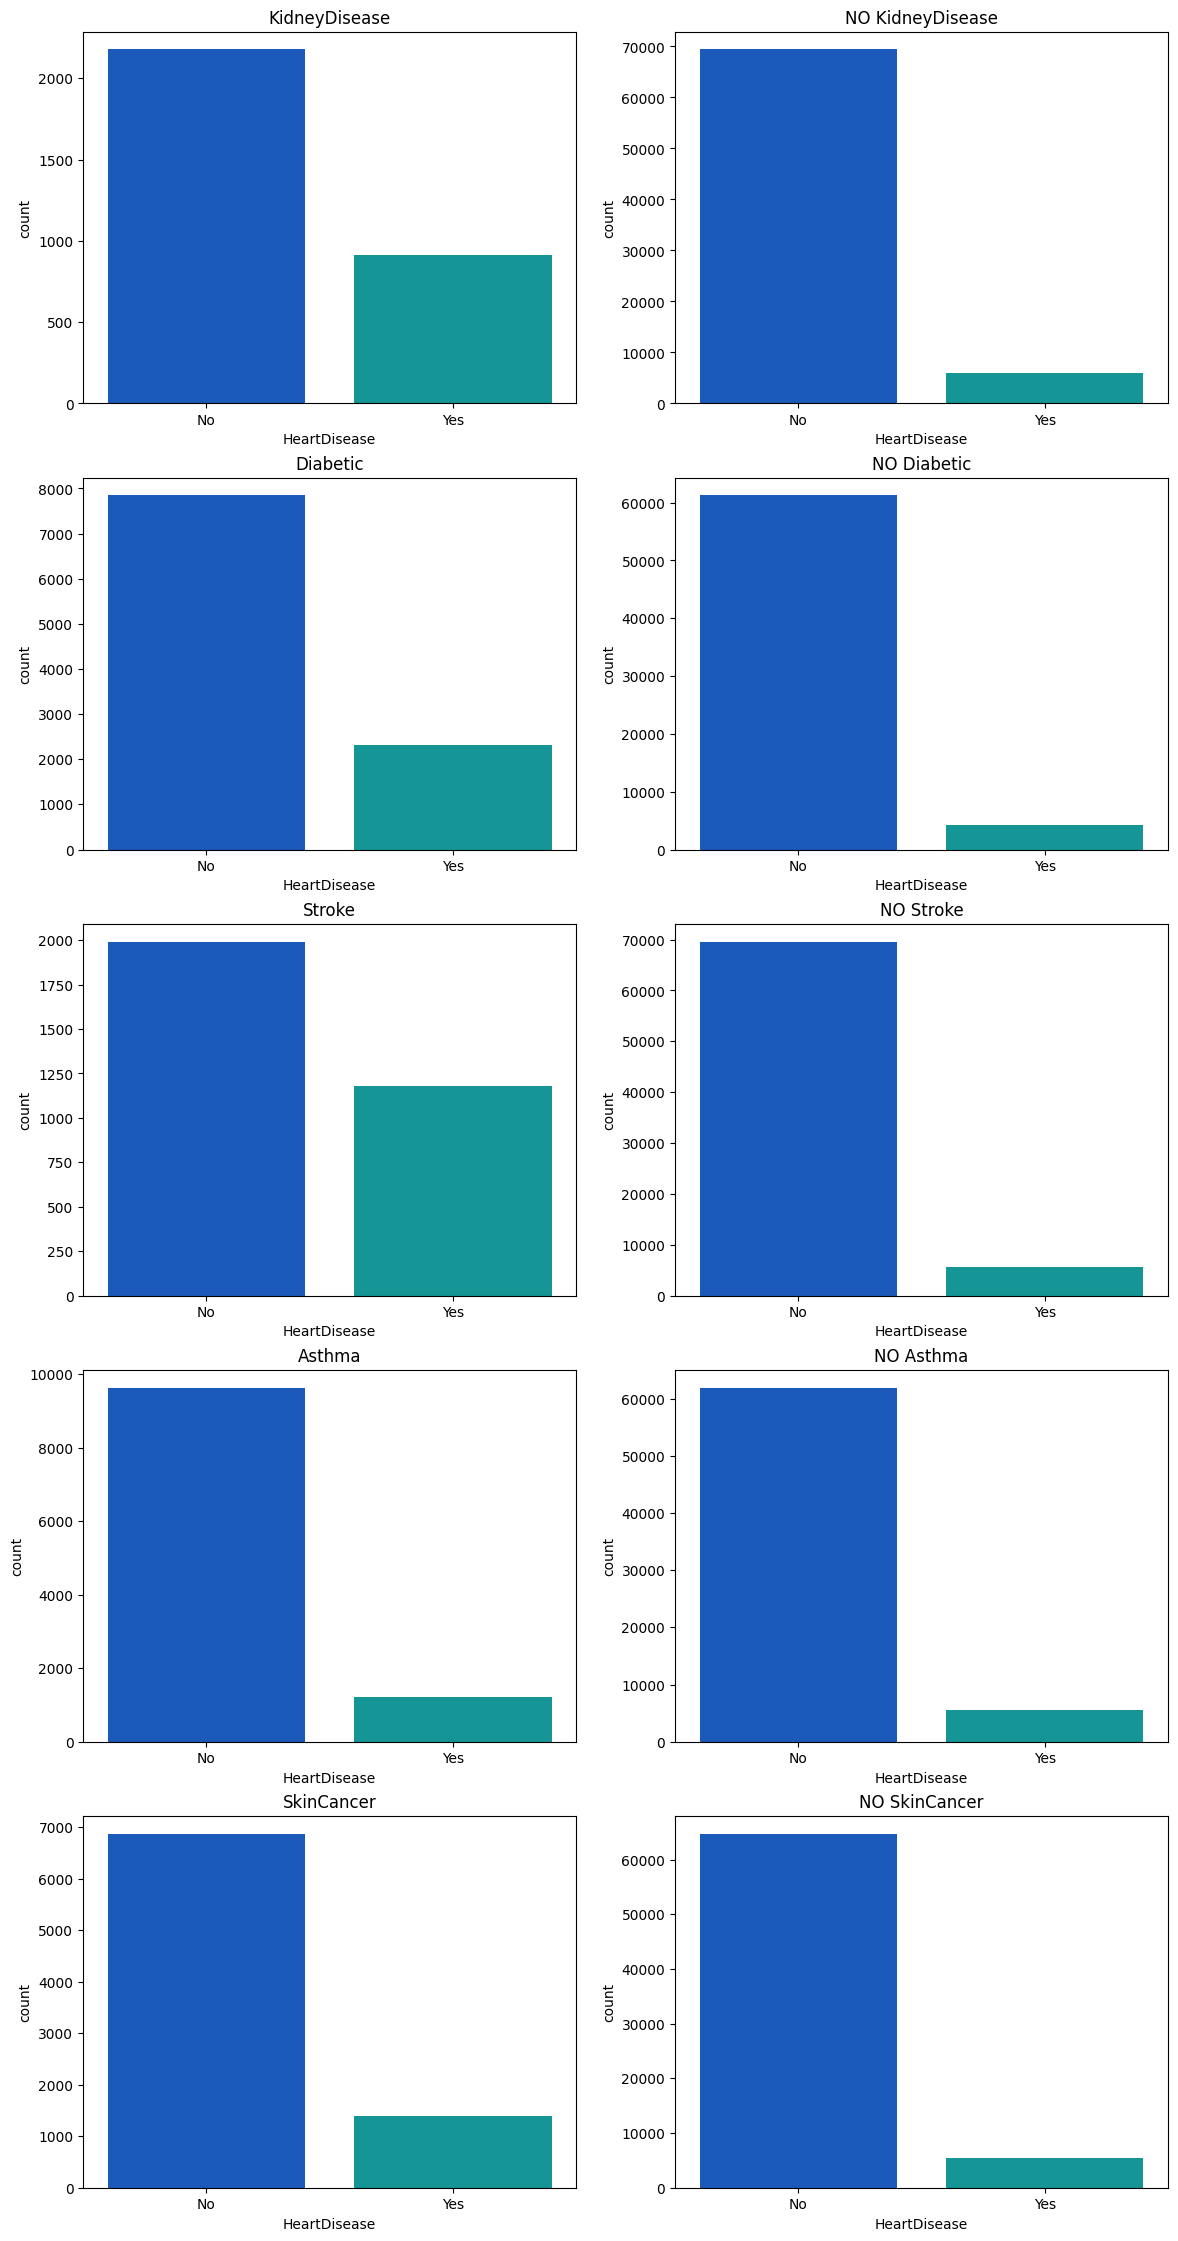

In [35]:
#Risk factors and how they effect Heart Disease
cols = ['KidneyDisease', 'Diabetic', 'Stroke', 'Asthma', 'SkinCancer']
fig, ax = plt.subplots(5, 2, figsize=(14, 28))

for i, col in enumerate(cols):
    df_yes = df[df[col] == 'Yes']
    df_no = df[df[col] == 'No']

    sns.countplot(data=df_yes, x='HeartDisease', ax=ax[i][0], palette='winter').set_title(col)
    sns.countplot(data=df_no, x='HeartDisease', ax=ax[i][1], palette='winter').set_title("NO " + col)

plt.show()


**Insights :** one Risk Factor alone can't decide whether it will cause Heart Disease or not

In [31]:
#Bad Habbits and how they effect Heart Disease


In [22]:
df.groupby(['AlcoholDrinking','HeartDisease'])['HeartDisease'].count()

AlcoholDrinking  HeartDisease
No               No              66463
                 Yes              6534
Yes              No               5132
                 Yes               312
Name: HeartDisease, dtype: int64

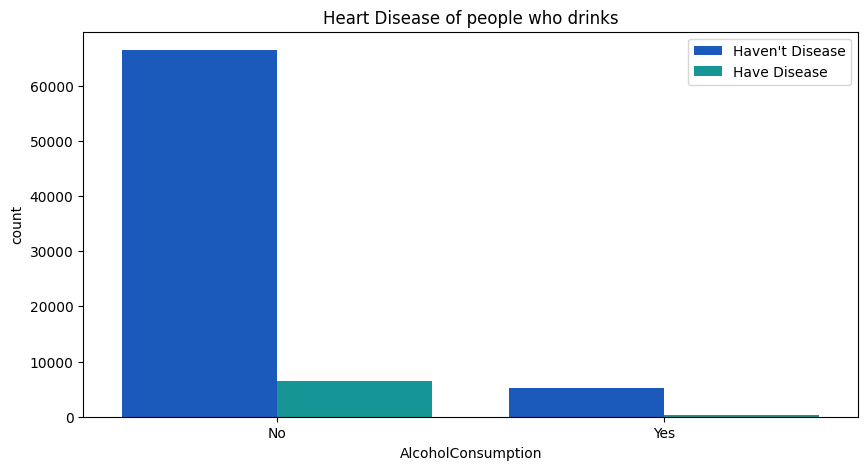

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(x='AlcoholDrinking',data=df,hue='HeartDisease',palette='winter')
plt.title('Heart Disease of people who drinks')
plt.legend(["Haven't Disease", "Have Disease"])
plt.xlabel('AlcoholConsumption')
plt.show()

In [32]:
df.groupby(['Smoking','HeartDisease'])['HeartDisease'].count()

Smoking  HeartDisease
No       No              42801
         Yes              2767
Yes      No              28794
         Yes              4079
Name: HeartDisease, dtype: int64

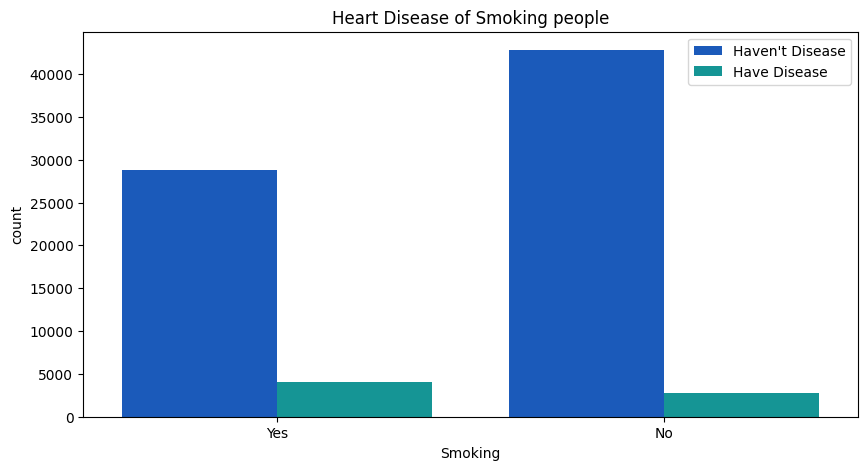

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(x='Smoking',data=df,hue='HeartDisease',palette='winter')
plt.title('Heart Disease of Smoking people')
plt.legend(["Haven't Disease", "Have Disease"])
plt.xlabel('Smoking')
plt.show()

**Insight:** Smoking can increase the risk of heart disease